# Hands-on 6: Simulated Quantum Annealing (SQA)

## A simple graph
For the first exercise with SQA we are going to do a simple graph like the following:
<table>
    <tr><td>
        <img src="graph1.png" width="33%"></td>
    </tr>
</table>
And apply a maxcut using SQA on the QLM.

### Step1: Create the graph
To create the graph you need to:
- import networkx
- create a graph by using the function Graph from networkx
- add the nodes to your graph by using add_nodes_from
- add the edges between the nodes by using add_edge

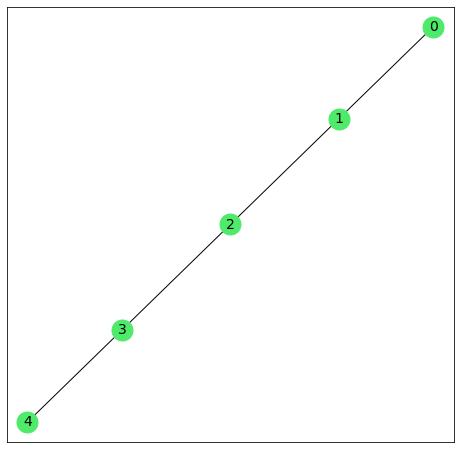

In [5]:
#Import networkx & pyplot from matplotlib
import networkx as nx

#Create our graph object
G = nx.Graph()

#Add our nodes
G.add_nodes_from([0, 1, 2, 3, 4])

#Add the edges
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)

#Plot our graph (nothing to complete here)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
nodes_positions = nx.spring_layout(G, iterations=len(G.nodes())*100)
nx.draw_networkx(G, 
                 pos=nodes_positions, 
                 node_color='#4EEA6A', 
                 node_size=440, 
                 font_size=14)
plt.show()

### Step 2: Create our problem
Create a max-cut problem on the QLM is simple once you have the graph:
- import the function MaxCut from qat.opt
- Create your problem object by using MaxCut on your Graph

In [6]:
#Import MaxCut from qat.opt
from qat.opt import MaxCut

#Create our problem from our graph with MaxCut
max_cut_problem = MaxCut(G)

### Step 3: Solve it using SQA
Once the problem created we can solve it by parametrizing the annealing:
- import the solver sqa from qat.mc.annealers
- import numpy to deal with the parameters
- extract J, h and offset enery using get_j_h_and_offset on the problem
- parametrize the annealing by specifying the number of steps, the lists for gamma and the temperature.
- do the annealing using sqa and the previous information
- plot the results

In [7]:
from qat.mc import sqa
help(sqa)
sqa?

Help on cython_function_or_method in module qat.mc.wrappers:

sqa(J_coupling, h_mag, gamma_list, temp_list, n_trotters=4, n_threads=1, seed=1024)
    Runs simulated quantum annealing on an Ising instance.
    
    Based on the discrete-time path integral Monte Carlo of
    an Ising Hamiltonian with a transverse field.
    
    Example of use:
    
    .. code-block:: python
    
        import networkx as nx
    
        graph = nx.full_rary_tree(2, 30)
    
        from qat.mc import sqa
        from qat.opt import MaxCut
    
        max_cut_problem = MaxCut(graph)
    
        # 1. Extraction
        J_coupling, h_mag, offset_J = max_cut_problem.get_j_h_and_offset()
    
        # 2. Load annealing parameters
        max_cut_parameters_dict = max_cut_problem.get_best_parameters()
        n_monte_carlo_updates = max_cut_parameters_dict["n_monte_carlo_updates"]
        n_trotters = max_cut_parameters_dict["n_trotters"]
        gamma_max = max_cut_parameters_dict["gamma_max"]
        g

Solution configuration: 
[ 1. -1.  1. -1.  1.]

The nodes in the first subgraph:
[0 2 4]

The nodes in the second subgraph:
[1 3]


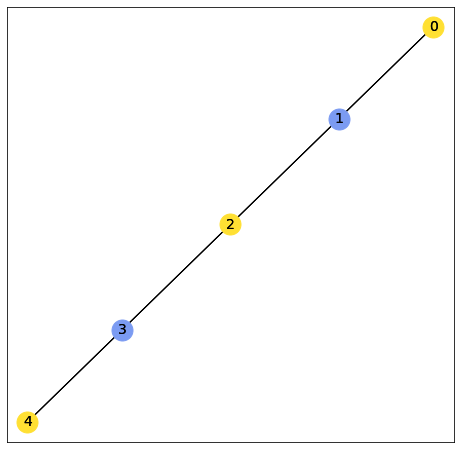

In [8]:
#from qat.mc import sqa
from qat.mc.annealers import cpp_sqa as sqa
import numpy as np

# 1. Extraction
J_coupling, h_mag, offset_J = max_cut_problem.get_j_h_and_offset()

# 2. Load annealing parameters
max_cut_parameters_dict = max_cut_problem.get_best_parameters()
n_monte_carlo_updates = max_cut_parameters_dict["n_monte_carlo_updates"]
n_trotters = max_cut_parameters_dict["n_trotters"]
gamma_max = max_cut_parameters_dict["gamma_max"]
gamma_min = max_cut_parameters_dict["gamma_min"]
temp_max = max_cut_parameters_dict["temp_max"]
temp_min = max_cut_parameters_dict["temp_min"] 

# 3. Create schedules for gamma and the temperature
n_steps = int(n_monte_carlo_updates /\
              (n_trotters * len(h_mag))) # the last one is the number of spins, i.e. the problem size
gamma_list = np.linspace(gamma_max, gamma_min, n_steps)
temp_list = np.linspace(temp_max, temp_min, n_steps)

# 4. Annealing
solution_configuration = sqa(J_coupling, 
                             h_mag,
                             gamma_list, 
                             temp_list, 
                             n_trotters=n_trotters)


# 5. Present best configuration and subgraphs nodes  (nothing to complete here)
print("Solution configuration: \n" + str(solution_configuration) + "\n")
indices_spin_1 = np.where(solution_configuration == 1)[0]
print("The nodes in the first subgraph:\n" + str(indices_spin_1) + "\n")
indices_spin_minus_1 = np.where(solution_configuration == -1)[0]
print("The nodes in the second subgraph:\n" + str(indices_spin_minus_1))

# 6. Draw the coloured subgraphs (nothing to complete here)
plt.figure(figsize=(8, 8))
node_size = 440
font_size = 14
nx.draw_networkx(G, 
                 pos=nodes_positions, 
                 nodelist=indices_spin_1.tolist(), 
                 node_color='#FFE033', 
                 node_size=node_size, 
                 font_size=font_size)

nx.draw_networkx(G, 
                 pos=nodes_positions, 
                 nodelist=indices_spin_minus_1.tolist(), 
                 node_color='#7B9BF2', 
                 node_size=node_size, 
                 font_size=font_size)

nx.draw_networkx_edges(G, pos=nodes_positions)
plt.show()

## The example from the lecture

Let's now try to do the example from the lecture, a max-cut on the following graph:
<table>
    <tr><td>
        <img src="graph.PNG" width="33%"></td>
    </tr>
</table>
We have just change the indexes of the nodes to begin at 0.

The steps are the same as previously.

### Step1: Create the graph
To create the graph you need to:
- import networkx
- create a graph by using the function Graph from networkx
- add the nodes to your graph by using add_nodes_from
- add the edges between the nodes by using add_edge

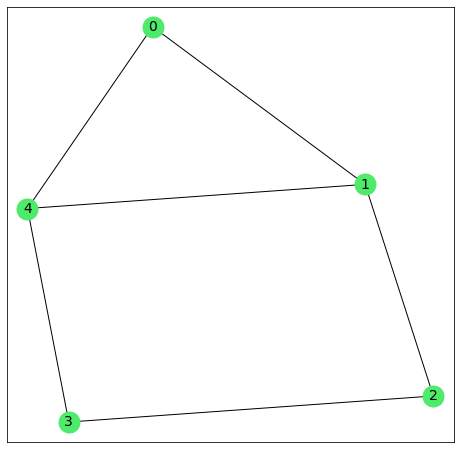

In [9]:
#Import networkx 
import networkx as nx

#Create our simple graph
G2 = nx.Graph()
G2.add_nodes_from([0, 1, 2, 3, 4])
G2.add_edge(0, 1)
G2.add_edge(0, 4)
G2.add_edge(1, 2)
G2.add_edge(1, 4)
G2.add_edge(2, 3)
G2.add_edge(3, 4)


#Plot our graph (nothing to complete here)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
nodes_positions = nx.spring_layout(G2, iterations=len(G2.nodes())*100)
nx.draw_networkx(G2, 
                 pos=nodes_positions, 
                 node_color='#4EEA6A', 
                 node_size=440, 
                 font_size=14)
plt.show()

### Step 2: Create our problem
Create a max-cut problem on the QLM is simple once you have the graph:
- import the function MaxCut from qat.opt
- Create your problem object by using MaxCut on your Graph

In [10]:
#Import MaxCut from qat.opt
from qat.opt import MaxCut

#Create our problem from our graph with MaxCut
max_cut_problem = MaxCut(G2)

### Step 3: Solve it using SQA
Once the problem created we can solve it by parametrizing the annealing:
- import numpy to deal with the parameters
- extract J, h and offset enery using get_j_h_and_offset on the problem
- parametrize the annealing by specifying the number of steps, the lists for gamma and the temperature.
- do the annealing using sqa and the previous information
- plot the results

Solution configuration: 
[-1. -1.  1. -1.  1.]

The nodes in the first subgraph:
[2 4]

The nodes in the second subgraph:
[0 1 3]


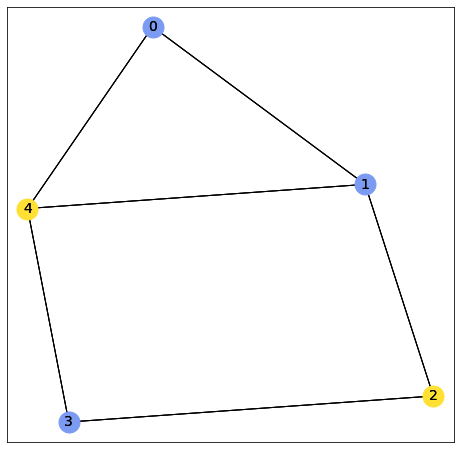

In [11]:
from qat.mc.annealers import cpp_sqa as sqa
import numpy as np

# 1. Extraction
J_coupling, h_mag, offset_J = max_cut_problem.get_j_h_and_offset()

# 2. Load annealing parameters
max_cut_parameters_dict = max_cut_problem.get_best_parameters()
n_monte_carlo_updates = max_cut_parameters_dict["n_monte_carlo_updates"]
n_trotters = max_cut_parameters_dict["n_trotters"]
gamma_max = max_cut_parameters_dict["gamma_max"]
gamma_min = max_cut_parameters_dict["gamma_min"]
temp_max = max_cut_parameters_dict["temp_max"]
temp_min = max_cut_parameters_dict["temp_min"] 

# 3. Create schedules for gamma and the temperature
n_steps = int(n_monte_carlo_updates /\
              (n_trotters * len(h_mag))) # the last one is the number of spins, i.e. the problem size
gamma_list = np.linspace(gamma_max, gamma_min, n_steps)
temp_list = np.linspace(temp_max, temp_min, n_steps)

# 4. Annealing
solution_configuration = sqa(J_coupling, 
                             h_mag,
                             gamma_list, 
                             temp_list, 
                             n_trotters=n_trotters)

# 5. Present best configuration and subgraphs nodes (nothing to complete here)
print("Solution configuration: \n" + str(solution_configuration) + "\n")
indices_spin_1 = np.where(solution_configuration == 1)[0]
print("The nodes in the first subgraph:\n" + str(indices_spin_1) + "\n")
indices_spin_minus_1 = np.where(solution_configuration == -1)[0]
print("The nodes in the second subgraph:\n" + str(indices_spin_minus_1))

# 6. Draw the coloured subgraphs (nothing to complete here)
plt.figure(figsize=(8, 8))
node_size = 440
font_size = 14
nx.draw_networkx(G2, 
                 pos=nodes_positions, 
                 nodelist=indices_spin_1.tolist(), 
                 node_color='#FFE033', 
                 node_size=node_size, 
                 font_size=font_size)

nx.draw_networkx(G2, 
                 pos=nodes_positions, 
                 nodelist=indices_spin_minus_1.tolist(), 
                 node_color='#7B9BF2', 
                 node_size=node_size, 
                 font_size=font_size)

nx.draw_networkx_edges(G2, pos=nodes_positions)
plt.show()